# Introduction to Pandas#

`pandas` is designed to make it easier to work with structured data. Most of the analyses you might perform will likely involve using tabular data. The `DataFrame` object in `pandas` is "a two-dimensional tabular, column-oriented data structure with both row and column labels." Think of it as a spreadsheet.

In [8]:
import pandas as pd

The building blocks for a `DataFrame` are `Series` objects (i.e., columns of a spreadsheet), which are essentally `numpy` arrays. We can also create `DataFrame`s from dictionaries and lists.

Let's work with an artificial example with just three records and three attributes.


In [9]:
my_dict = {'Age': [32, 47, 36],            
           'Name': ['Xavier', 'Ygne', 'Zed'],
          'Salary': [44000, 55000, 40000] }

my_df = pd.DataFrame(my_dict)
my_df

,Age,Name,Salary
0,32,Xavier,44000
1,47,Ygne,55000
2,36,Zed,40000


### Basics

Let's figure out how many rows and columns are in our `DataFrame`

In [10]:
my_df.shape

(3, 3)

We can also perform a high-level summary of the values. Note: only summaries of the numeric values are returned.

In [11]:
my_df.describe()

,Age,Salary
count,3.000000,3.000000
mean,38.333333,46333.333333
std,7.767453,7767.453465
min,32.000000,40000.000000
25%,34.000000,42000.000000
50%,36.000000,44000.000000
75%,41.500000,49500.000000
max,47.000000,55000.000000


### Subsetting / Filtering / Indexing

`pandas` automatically creates a row index for you, which you can easily access:

In [12]:
my_df.index

Int64Index([0, 1, 2], dtype='int64')

We also have a column index:

In [13]:
my_df.columns

Index(['Age', 'Name', 'Salary'], dtype='object')

We can select individual columns in many ways

In [14]:
my_df.Age

0    32
1    47
2    36
Name: Age, dtype: int64

In [15]:
my_df['Age']

0    32
1    47
2    36
Name: Age, dtype: int64

Let's return just the first 2 values:

In [16]:
my_df[:2]

,Age,Name,Salary
0,32,Xavier,44000
1,47,Ygne,55000


and now the last value:

In [17]:
my_df[-1:]

,Age,Name,Salary
2,36,Zed,40000


Let's now index by the first 2 columns by name:

In [18]:
my_df[['Age', 'Salary']]

,Age,Salary
0,32,44000
1,47,55000
2,36,40000


or alternatively using the `.loc` operator, which a label-based indexing function. This approach uses the slice notation:

> `DataFrame.iloc[row_start:row_end, column_start:column_end]`

We use  `:` to represent the entire row index.

In [19]:
my_df.loc[:]

,Age,Name,Salary
0,32,Xavier,44000
1,47,Ygne,55000
2,36,Zed,40000


We can use do a subset with or without brackets.

In [20]:
my_df.loc[:, 'Age' : 'Name']

,Age,Name
0,32,Xavier
1,47,Ygne
2,36,Zed


or 

In [21]:
my_df.loc[:,['Age', 'Name']]

,Age,Name
0,32,Xavier
1,47,Ygne
2,36,Zed


To index by column number, we need to use the `.iloc` operator and the slice notation: 

In [22]:
my_df.iloc[:,0:2]

,Age,Name
0,32,Xavier
1,47,Ygne
2,36,Zed


We can also subset using the `.ix` operator, which supports mixed label and position indexing:

In [23]:
my_df.ix[:,0:2]

,Age,Name
0,32,Xavier
1,47,Ygne
2,36,Zed


Let's subset by both row and column:

In [24]:
my_df.loc[:1, :'Name']

,Age,Name
0,32,Xavier
1,47,Ygne


In [25]:
my_df.iloc[:2, :2]

,Age,Name
0,32,Xavier
1,47,Ygne


In [26]:
my_df.ix[:1, :2]

,Age,Name
0,32,Xavier
1,47,Ygne


We can also filter our `DataFrame` using boolean expressions:

In [27]:
my_df > 40

,Age,Name,Salary
0,False,True,True
1,True,True,True
2,False,True,True


We can pass this expression to the original `DataFrame` to display the true results:

In [28]:
my_df[my_df > 40]

,Age,Name,Salary
0,NaN,Xavier,44000
1,47,Ygne,55000
2,NaN,Zed,40000


Let's filter by a specific column:

In [29]:
my_df[my_df.Age > 40]

,Age,Name,Salary
1,47,Ygne,55000


Multiple columns:

In [30]:
my_df[(my_df.Age > 40) & (my_df.Salary == 55000)]

,Age,Name,Salary
1,47,Ygne,55000


### tl;dr - there are lots of ways to subset your data!

### Basic statistics

Let's look at the unique values in the 3rd row:

In [31]:
my_df.Name.unique()

array(['Xavier', 'Ygne', 'Zed'], dtype=object)

Count the number of unique values in the 3rd row:

In [32]:
my_df.Name.nunique()

3

How about the mean for the 1st column

In [33]:
my_df.Age.mean()

38.333333333333336

Many simple statistical functions and be performed by row(s) and column(s):

* min
* max
* mean
* median
* sum
* std
* cov

In [34]:
my_df.Salary.min()

40000

Max value for each row:

In [35]:
my_df.max(axis=1)

0    44000
1    55000
2    40000
dtype: int64

Sum of each column:

In [36]:
my_df.sum(axis=0)

Age                 115
Name      XavierYgneZed
Salary           139000
dtype: object

### Exercise: Normalize the first two columns using the following formula:

$$z = {x- \mu \over \sigma}$$

(Note: this formula is different than the one used in class.)

For a single column:

In [37]:
(my_df.Age - my_df.Age.mean())/my_df.Age.std()

0   -0.815368
1    1.115767
2   -0.300399
Name: Age, dtype: float64

Now standardize for the first two of columns:

In [38]:
my_df[['Age', 'Salary']].apply(lambda column: (column - column.mean())/column.std(), axis=0)

,Age,Salary
0,-0.815368,-0.300399
1,1.115767,1.115767
2,-0.300399,-0.815368


The `apply` allows us to perform column- or row-wise operations efficiently using Python's anonymous `lambda` functions. The `axis` variable specifies the whether the operation should be performed on the column or row.

# Running Example: Consumer Complaint Data #

### Reading a csv file

Let's import data straight into a `DataFrame` from most file types, e.g. `.csv` or `.json`.

Download the consumer complaints dataset as a `.csv` file here: https://data.consumerfinance.gov/dataset/Consumer-Complaints/s6ew-h6mp

Description from [Consumer Financial Protection Bureau](http://www.consumerfinance.gov/complaintdatabase/):

> Each week we send thousands of consumers' complaints about financial products and services to companies for response. Complaints are listed in the database after the company responds or after they’ve had the complaint for 15 calendar days, whichever comes first.

> We publish the consumer’s description of what happened if the consumer opts to share it and after taking steps to remove personal information. See our Scrubbing Standard for more details

> We don’t verify all the facts alleged in these complaints, but we take steps to confirm a commercial relationship. We may remove complaints if they don’t meet all of the publication criteria. Data is refreshed nightly.

In [39]:
df = pd.read_csv("Consumer_Complaints.csv", low_memory=False)

### First look at your data

In [40]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,10/15/2015,Payday loan,NaN,Can't contact lender,NaN,NaN,NaN,CNG Financial Corporation,DC,20020,Web,10/15/2015,Closed with explanation,Yes,NaN,1608169
1,10/15/2015,Debt collection,"Other (phone, health club, etc.)",Communication tactics,Frequent or repeated calls,NaN,NaN,Springleaf Finance Corporation,VA,22846,Web,10/15/2015,In progress,Yes,NaN,1608255
2,10/15/2015,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,NaN,NaN,"CMRE Financial Services, Inc.",CA,93065,Web,10/15/2015,In progress,Yes,NaN,1608600
3,10/14/2015,Debt collection,"Other (phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"E. A. Uffman & Associates, Inc",KS,66606,Web,10/14/2015,Closed with explanation,Yes,NaN,1605866
4,10/14/2015,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,NaN,NaN,"Convergent Resources, Inc.",IL,61801,Web,10/14/2015,Closed with explanation,Yes,NaN,1606683


### The data is really wide! Let's extract a few columns to review

We can pass a list of column names to our filter our DataFrame

In [41]:
cols = ["Product", "Sub-product", "Issue", "Sub-issue", 
        "Consumer complaint narrative", "Company public response", 
        "Company", "Company response to consumer"]

Put the list of column names in brackets after the name of the DataFrame to subset. 

In [42]:
df[cols].head()

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,Company response to consumer
0,Payday loan,NaN,Can't contact lender,NaN,NaN,NaN,CNG Financial Corporation,Closed with explanation
1,Debt collection,"Other (phone, health club, etc.)",Communication tactics,Frequent or repeated calls,NaN,NaN,Springleaf Finance Corporation,In progress
2,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,NaN,NaN,"CMRE Financial Services, Inc.",In progress
3,Debt collection,"Other (phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"E. A. Uffman & Associates, Inc",Closed with explanation
4,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,NaN,NaN,"Convergent Resources, Inc.",Closed with explanation


### Return all rows that do not have `NaN` in the `Consumer complaint narrative` column

The `df["Consumer complaint narrative"].notnull()` argument returns a boolean of values, `True` if the data are not null (`NaN`) and `False` for the rest. We place the array of boolean values within the DataFrame `df` to subset it further. The `reset_index()` function gives us a clean index so we don't have to use the same indices as the larger DataFrame for subsetting.

In [43]:
filtered_data = df["Consumer complaint narrative"].notnull()
filtered_data[:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Consumer complaint narrative, dtype: bool

In [44]:
df_narrative = df[filtered_data]

Notice where the index starts on the left-most column and how the row indices skip-around.

In [45]:
df_narrative[cols].head()

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,Company response to consumer
6498,Debt collection,"Other (phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,"FOCUS RECEIVABLES MANAGEXXXX XXXX PK XXXX, XXX...",Company chooses not to provide a public response,Focus Holding Company,Closed with explanation
6500,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,LenderLive services my mortgage and has never ...,Company believes it acted appropriately as aut...,Lender Live,Closed with explanation
6708,Debt collection,Credit card,Communication tactics,Used obscene/profane/abusive language,I was working on my son and his friends bike a...,Company chooses not to provide a public response,Collection Service of Nevada,Closed with explanation
6780,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,Allied Interstate LLC calls me approximately X...,Company chooses not to provide a public response,Allied Interstate LLC,Closed with non-monetary relief
6795,Credit card,NaN,Billing statement,NaN,Citi refused to generate my credit card statem...,Company chooses not to provide a public response,Citibank,Closed with explanation


### Plotting with Pandas

We can plot the distribution of categories in the `Products` column by chaining the `.value_counts()` and `.plot()` methods after selecting the `Products` column

We can then count for each unique value in that column the number of observations within in the DataFrame, which we sort ascending.

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
sorted_product_counts = df_narrative.Product.value_counts(ascending=True)
sorted_product_counts

Other financial service      48
Prepaid card                188
Money transfers             300
Payday loan                 333
Student loan               1014
Consumer loan              1570
Bank account or service    2418
Credit card                3358
Credit reporting           5721
Mortgage                   6833
Debt collection            8141
dtype: int64

Next, we can plot a horizontal (`barh`) bar graph to view the results, fix the fiture size to 8x6, and give it a title.

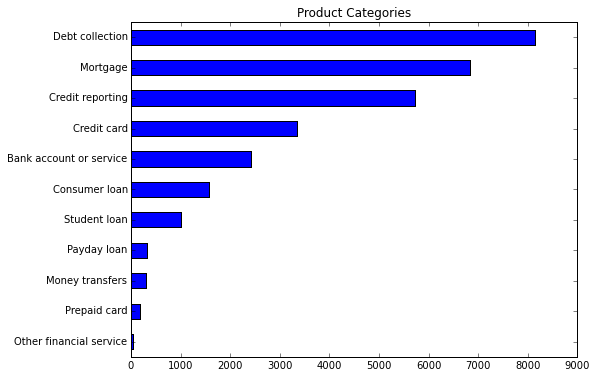

In [48]:
sorted_product_counts.plot(kind='barh', figsize=(8,6), title="Product Categories");

### Create training, development, and test sets

First, let's shuffle the rows in our `DataFrame`. There are many ways of splitting our data into training, development, and test sets. We'll use the `numpy` function `random.permutation` to generate a randomized array of row indices. 

(Alternatively, we can use the [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html) function from `sklearn.cross_validation` to easily create training and "test" sets.)

In [49]:
df_narrative.index[:10]

Int64Index([6498, 6500, 6708, 6780, 6795, 6807, 6843, 6906, 6909, 6912], dtype='int64')

In [50]:
import numpy as np

random_index = np.random.permutation(df_narrative.index)
random_index[:10]

array([44414, 78474, 69031, 24899, 49681, 83992, 31710, 31310, 30759, 26613])

With this randomized index, we'll need to reset the index of our new `DataFrame`. This allows us to us the normal indexing approaches.

The `drop=True` option in `reset_index()` resets our rows without adding a new column indicated the old index while `inplace=True` performs the operation in place instead of returned a copy of the `DataFrame`.

In [51]:
df_narrative.ix[random_index, ['Product', 'Consumer complaint narrative']][:5]

,Product,Consumer complaint narrative
44414,Consumer loan,"Fair Debt Collection Practices Act, 15 USC 169..."
78474,Debt collection,Company continues to negatively impact credit ...
69031,Mortgage,hi I have a mortgage on a dairy farm The dairy...
24899,Credit card,I had a credit card issued by Citi. According ...
49681,Credit card,I had XXXX late payment so Citi card lowered m...


In [52]:
df_narrative_shuffled = df_narrative.ix[random_index, ['Product', 'Consumer complaint narrative']]
df_narrative_shuffled.reset_index(drop=True, inplace=True)
df_narrative_shuffled[:5]

,Product,Consumer complaint narrative
0,Consumer loan,"Fair Debt Collection Practices Act, 15 USC 169..."
1,Debt collection,Company continues to negatively impact credit ...
2,Mortgage,hi I have a mortgage on a dairy farm The dairy...
3,Credit card,I had a credit card issued by Citi. According ...
4,Credit card,I had XXXX late payment so Citi card lowered m...


### Create 60/20/20 split for training/dev/test sets

The `.shape` function returns a tuple of the number of rows and columns in a DataFrame

In [53]:
rows, columns = df_narrative_shuffled.shape
print("Rows:", rows)
print("Columns:", columns)

Rows: 29924
Columns: 2


In [54]:
train_size = round(rows*.6)
dev_size   = round(rows*.2)

First 60% of rows are the training set

In [55]:
df_train = df_narrative_shuffled.loc[:train_size]
df_train.shape

(17955, 2)

Followed by the next 20% of rows for the development set

In [56]:
df_dev = df_narrative_shuffled.loc[train_size:dev_size+train_size].reset_index(drop=True)
df_dev.shape

(5986, 2)

And the last 20% are the test set



In [ ]:
df_test = df_narrative_shuffled.loc[dev_size+train_size:].reset_index(drop=True)
df_test.shape